<h1>Honorifics Data Analysis</h1>

In [1]:
# import needed packages
from functions import *

# read in data
data = pd.read_csv("data_honorifics.csv")

# random seed for clustering
randomSeed = 5

<h2>Part One: Clustering Based on Mapped Values</h2>
For the first try at clustering the honorifics data, I created a vocab list and mapped each answer to a number. Then clustered the dataset from there. The benefits of this approach are that it's easy to implement and easy to use for clustering. The drawbacks are that using Kmeans to cluster will probably result in slightly skewed clustering since numbers that are closer to each other will be treated as more similar (which is not necessarily true since the numbers have very little meaning in this context). This issue will be addressed in the second section.

In [2]:
# isolate the question portion of the dataset
questions = data.iloc[:,7:24]
questions = questions.fillna("I don't know")

vocab = []
qcols = []
# get questions column names
for question in range(1,18):
    qcols.append("Q"+str(question))

# get total unique responses in survey
stackedDf = questions.stack()
vocab = stackedDf.unique()

Below is the dictionary created to map string values to numbers. A sample is printed out.

In [3]:
# make a dict to map words to numbers
dict = {}
for val in range(len(vocab)):
    dict[vocab[val]]=val
for i,key in enumerate(dict.keys()):
    print(key+":"+str(dict[key]))
    if i==5:
        break

Grandma:0
stone:1
Teacher:2
Teacup:3
Thought:4
Cat:5


Next we take the dictionary and use it to create a dataframe where the string values are mapped to numbers. This dataframe is what we will use to create clusters.

In [4]:
# map the dataframe vals to nums
df = pd.DataFrame()
for q in qcols:
    df[q] = questions[q].map(dict)
# fill nas with idks
df = df.fillna(dict["I don\'t know"])

df

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17
0    0   1   2   3   1   2   4   3   5    5    6    7    8    9   10   11   12
1    4   1   2   3   1   2   4   3   5    5   13   14    8    9   15   11   12
2    0  13   2  13  16   2  13  17   9   13    8   13    8    9   13   18   13
3    0   1   2   3   1   2  15   3   5   15    8   19    8   20   15   18    9
4    0   1   2   3   1   2   4   3   5    5    6    7    8    9   21   11   12
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...
62   0  13   2  13  13   2  32  13  13   13   13   13    8    9   15   11   13
63   0   1   2   3   1   2  32   3   5    5    8   19    8   15   15   15   15
64   0   1   2   3   1   2   4   3   5    5    6    7    8   22   10   15   12
65   0   1   2   3   1   2  32   3   9    5    8   19    8   20   15   15   15
66   4   1   2   3   1   2   4   3   5    5    8    7    8   22   10   11   12

[67 rows x 17 columns]

Now that we have our new dataframe, we can perform clustering (using Kmeans). We begin by looking at the inertias of different kmeans cluster numbers to determine an appropriate number of clusters for our data. As you can see from the below graph, there is no clear elbow. Further analysis will all be performed on sets of 6 clusters.

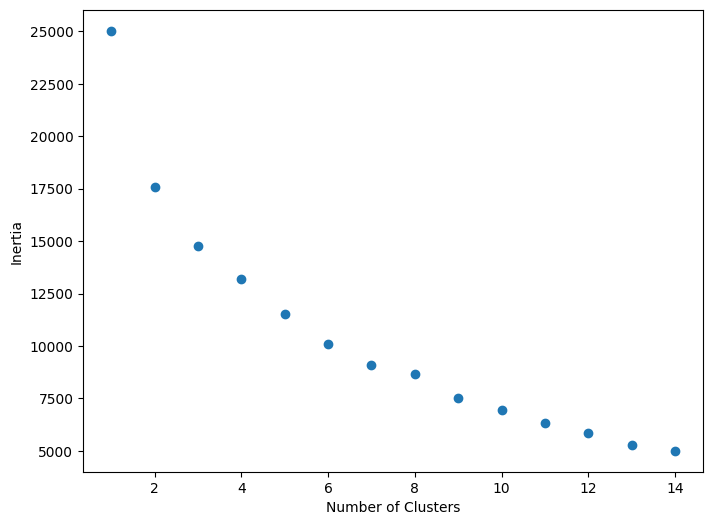

In [5]:
# graph cluster inertias for 1-15 clusters
clusterDf = doKmeans(df,range(1,15))

<h3>Age Across Clusters</h3>
Now that we have clusters to work with, we can see if there are any age differences between clusters of responses. As you can tell, there are some age differences between clusters, but when we run statistical analyses the age differences are shown to not be significant.

In [6]:
# add age to the cluster df
clusterDf["Age"]=data["Age"]
# print the cluster sets for 6 clusters
rows6 = printClusterSetAge(clusterDf,6)
print(f_oneway(*rows6,nan_policy="omit"))

Cluster 0
mean: 28.0

Cluster 1
mean: 34.5

Cluster 2
mean: 24.263157894736842

Cluster 3
mean: 25.75

Cluster 4
mean: 30.166666666666668

Cluster 5
mean: 19.666666666666668

F_onewayResult(statistic=1.2274814354764665, pvalue=0.30991000999963997)


To further confirm these results, we do the same analysis on 2, 4, and 8 clusters of the data.

In [7]:
print("Two Clusters: ")
rows2 = printClusterSetAge(clusterDf,2)
print("--------------------------------\nFour Clusters: ")
rows4 = printClusterSetAge(clusterDf,4)
print("--------------------------------\nEight Clusters: ")
rows8 = printClusterSetAge(clusterDf,8)

Two Clusters: 
Cluster 0
mean: 26.372093023255815

Cluster 1
mean: 29.5

--------------------------------
Four Clusters: 
Cluster 0
mean: 26.5625

Cluster 1
mean: 34.5

Cluster 2
mean: 26.25925925925926

Cluster 3
mean: 25.75

--------------------------------
Eight Clusters: 
Cluster 0
mean: 28.875

Cluster 1
mean: 36.57142857142857

Cluster 2
mean: 25.782608695652176

Cluster 3
mean: 23.0

Cluster 4
mean: 29.714285714285715

Cluster 5
mean: 21.5

Cluster 6
mean: 22.333333333333332

Cluster 7
mean: 19.666666666666668



Below is the statistical analyses of the age for 2, 4, and 8 clusters. None of them are statistically significant.

In [8]:
# ttest on clusters ages
# no significant
print(ttest_ind(list(rows2[0]),list(rows2[1]),nan_policy="omit"))
print(f_oneway(*rows4,nan_policy="omit"))
print(f_oneway(*rows8,nan_policy="omit"))

TtestResult(statistic=-0.8899559262088101, pvalue=0.3773658821898026, df=55.0)
F_onewayResult(statistic=0.937386376494588, pvalue=0.42918935134444425)
F_onewayResult(statistic=1.2762466067371379, pvalue=0.28162824838667305)


<h2>Post Clustering analysis</h2>
Below you will find the analysis we did to see if age was correlated with any of the specific question responses, as well as if any one question response was correlated to another question response. Below, we look at if age is correlated with the response to each individual question. The three questions with statistically significant differences in age between responses were questions 7, 10, and 16.

Result summary:
- possible correlation between age and response in Q7, Q10 and Q16
    - caveat that sample sizes for some responses within these questions were very small 
- correlation between question responses mostly for "i don't know"

In [9]:
# add age col to dataframe
df["Age"]=data["Age"]

# does the pVal test for every question and prints the ones with significant p-vals
for q in qcols:
    val = pValTest(df,q)[1]
    if val<0.05:
        print(q)
        print(val)

Q7
0.00012868932909781148
Q10
5.655010199102175e-05
Q16
0.0029334574030703015


/Users/zoestephens/Desktop/summer2024/zstephe.github.io/honorifics/functions.py:99: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  result = f_oneway(*rows,nan_policy="omit")


Now that we have identified the statistically significant questions, we will look more closely at each question and see which specific responses had different age ranges.

<h4>Question 7</h4>
Question text: This thought is nice.

The "Listener" response has a significantly higher mean than all the other responses.

In [21]:
# looking at Question 7
# appears to be a higher age with the Listener answer, but not many datapoints
examineQuestion("Q7",questions,df["Age"])

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.019     0.921   -10.485     6.446
 (0 - 2)    -27.769     0.000   -43.134   -12.405
 (0 - 3)      5.897     0.740    -9.467    21.262
 (1 - 0)      2.019     0.921    -6.446    10.485
 (1 - 2)    -25.750     0.001   -42.303    -9.197
 (1 - 3)      7.917     0.587    -8.636    24.470
 (2 - 0)     27.769     0.000    12.405    43.134
 (2 - 1)     25.750     0.001     9.197    42.303
 (2 - 3)     33.667     0.000    12.729    54.605
 (3 - 0)     -5.897     0.740   -21.262     9.467
 (3 - 1)     -7.917     0.587   -24.470     8.636
 (3 - 2)    -33.667     0.000   -54.605   -12.729

Counts of each Response
Q7
Thought               45
I don't know          14
Listener               4
Thinker of Thought     4
Name: count, dtype: int64

Group Means
Thought : 25.564102564102566

I don't know : 27.583333333333332

Listener : 53.333333333333336

Thinker of Thought 

<h4>Question 10</h4>
Question text: The cat is big.

The "Cat Owner" response was not included in the tukey test since there was only one such response.
The "Listener" response has a significantly higher mean than all the other responses (excluding cat owner).

In [23]:
# looking at Question 10
# appears to have a higher age with Listener and Cat owner responses but not many responses
examineQuestion("Q10",questions,df['Age'])

SKIPPING A VALUE DUE TO LACK OF DATA (ONLY 1 POINT AVAILABLE)
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -8.710     0.192   -20.630     3.210
 (0 - 2)    -30.460     0.000   -47.002   -13.918
 (1 - 0)      8.710     0.192    -3.210    20.630
 (1 - 2)    -21.750     0.029   -41.617    -1.883
 (2 - 0)     30.460     0.000    13.918    47.002
 (2 - 1)     21.750     0.029     1.883    41.617

Counts of each Response
Q10
Cat             56
I don't know     7
Listener         3
Cat owner        1
Name: count, dtype: int64

Group Means
Cat : 25.04

I don't know : 33.75

Listener : 55.5

Cat owner : 49.0



<h4>Question 16</h4>
Question text: Mother’s murderer was cruel.

The "Mother" response has a significantly higher mean than the "Murderer" and "Other" responses.

In [25]:
# looking at Question 16
# appears to have a higher age with Mother but not many responses
# tukey shows difference between (Mother and Murderer) and (Mother and Listener)

# participants who picked "Mother" older than those who picked "Murderer" or "Listener"
examineQuestion("Q16",questions,df['Age'])

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -18.662     0.003   -32.253    -5.071
 (0 - 2)      5.338     0.801    -8.253    18.929
 (0 - 3)     -6.262     0.840   -23.430    10.906
 (0 - 4)      2.738     0.996   -18.054    23.530
 (1 - 0)     18.662     0.003     5.071    32.253
 (1 - 2)     24.000     0.004     5.831    42.169
 (1 - 3)     12.400     0.461    -8.580    33.380
 (1 - 4)     21.400     0.103    -2.636    45.436
 (2 - 0)     -5.338     0.801   -18.929     8.253
 (2 - 1)    -24.000     0.004   -42.169    -5.831
 (2 - 3)    -11.600     0.528   -32.580     9.380
 (2 - 4)     -2.600     0.998   -26.636    21.436
 (3 - 0)      6.262     0.840   -10.906    23.430
 (3 - 1)    -12.400     0.461   -33.380     8.580
 (3 - 2)     11.600     0.528    -9.380    32.580
 (3 - 4)      9.000     0.867   -17.225    35.225
 (4 - 0)     -2.738     0.996   -23.530    18.054
 (4 - 1)    -21.400     0.103   

In [223]:
hot_encoded_questions=pd.DataFrame()
for col in questions.columns:
    length = questions[col].nunique()
    arr = []
    for i in range(length):
        arr.append(0)
    temp = {}
    for i,val in enumerate(questions[col].unique(),0):
        arr[i]=1
        temp[val]=list(arr)
        arr[i]=0
    hot_encoded_questions[col] = questions[col].map(temp)

In [270]:
test = pd.DataFrame()
for col in questions.columns:
    for val in questions[col].unique():
        test[col+"-"+val]=(questions[col]==val).map({True: 1, False: 0})
test

Q1-Grandma  Q1-Thought  Q1-I don't know  Q2-stone  Q2-I don't know  \
0            1           0                0         1                0   
1            0           1                0         1                0   
2            1           0                0         0                1   
3            1           0                0         1                0   
4            1           0                0         1                0   
..         ...         ...              ...       ...              ...   
62           1           0                0         0                1   
63           1           0                0         1                0   
64           1           0                0         1                0   
65           1           0                0         1                0   
66           0           1                0         1                0   

    Q2-Listener  Q3-Teacher  Q3-I don't know  Q4-Teacup  Q4-I don't know  ...  \
0             0           1                0          1                0  ...   
1             0           1                0          1                0  ...   
2             0           1                0          0                1  ...   
3             0           1                0          1                0  ...   
4             0           1                0          1                0  ...   
..          ...         ...              ...        ...              ...  ...   
62            0           1                0          0                1  ...   
63            0           1                0          1                0  ...   
64            0           1                0          1                0  ...   
65            0           1                0          1                0  ...   
66            0           1                0          1                0  ...   

    Q16-Murderer  Q16-Mother  Q16-Other  Q16-Listener  Q16-I don't know  \
0              1           0          0             0                 0   
1              1           0          0             0                 0   
2              0           1          0             0                 0   
3              0           1          0             0                 0   
4              1           0          0             0                 0   
..           ...         ...        ...           ...               ...   
62             1           0          0             0                 0   
63             0           0          0             1                 0   
64             0           0          0             1                 0   
65             0           0          0             1                 0   
66             1           0          0             0                 0   

    Q17-Car  Q17-I don't know  Q17-Father  Q17-Listener  Q17-B  
0         1                 0           0             0      0  
1         1                 0           0             0      0  
2         0                 1           0             0      0  
3         0                 0           1             0      0  
4         1                 0           0             0      0  
..      ...               ...         ...           ...    ...  
62        0                 1           0             0      0  
63        0                 0           0             1      0  
64        1                 0           0             0      0  
65        0                 0           0             1      0  
66        1                 0           0             0      0  

[67 rows x 68 columns]

In [317]:


# looks at Q7 bc there was a significant anova diff
# not entirely sure if this is valid, bc there were only 4 responses and one's age was Nan
df[["Q7","Age"]]
d = data[["Q7","Age"]].dropna()
pValTest(d,"Q7",tukey=True)

# looks at Q10 bc there was a significant anova diff
# once again not sure if significant diff one group had 3 vals, one of which was Nan and other had 1 val
# could be significant that the only people who didn't choose cat or idk where older???
df[["Q10","Age"]]
d = data[data['Q10']!="Cat owner"][["Q10","Age"]].dropna()
pValTest(d,"Q10",tukey=True)

(F_onewayResult(statistic=11.955941795772484, pvalue=5.346049499130906e-05),
 <scipy.stats._hypotests.TukeyHSDResult at 0x15228c440>)

In [238]:
for q1 in qcols:
    for q2 in qcols:
        if q1==q2:
            break
        p_vals = compareCols(questions[q1],questions[q2],show=True)
        for p in range(len(p_vals)):
            if p_vals[p]<0.05:
                print("Q1: "+q1)
                print("Q2: "+q2)
                print("Q1 answer: "+questions[q1].unique()[p])
                print("p-val: "+str(p_vals[p]))

[[0.603448275862069, 0.39655172413793105, 0.0], [0.875, 0.0, 0.125], [1.0, 0.0, 0.0]]
[[0.6515151515151515, 0.3484848484848485, 0.0], [0.0, 0.0, 1.0]]
Q1: Q3
Q2: Q1
Q1 answer: I don't know
p-val: 4.6588861451034285e-15
[[0.8787878787878788, 0.10606060606060606, 0.015151515151515152], [0.0, 1.0, 0.0]]
Q1: Q3
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
[[0.5964912280701754, 0.40350877192982454, 0.0], [0.875, 0.0, 0.125], [1.0, 0.0, 0.0]]
[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.5, 0.0, 0.5]]
Q1: Q4
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
Q1: Q4
Q2: Q2
Q1 answer: Listener
p-val: 0.0003290185085717966
[[1.0, 0.0], [0.875, 0.125], [1.0, 0.0]]
[[0.5106382978723404, 0.48936170212765956, 0.0], [1.0, 0.0, 0.0], [0.75, 0.0, 0.25]]
[[1.0, 0.0, 0.0], [0.6875, 0.25, 0.0625], [0.0, 1.0, 0.0]]
Q1: Q5
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
[[1.0, 0.0], [1.0, 0.0], [0.75, 0.25]]
[[1.0, 0.0, 0.0], [0.625, 0.25, 0.125], [0.0, 1.0, 0.0]]
Q1: Q5
Q2: Q4
Q1 

<h2>CONCLUSIONS OF ABOVE</h2>
Only possible significance is i don't know responses (this is definitely true from further looking below). Other tests not worth noting since they are where there was only one of a response. 

In terms of age differences in for specific question answers, the most clear one is question 16---question 7 and 10 have differences but could be due to very small sample size


In [239]:
idkResults = []
for q1 in qcols:
    for q2 in qcols:
        if q1==q2:
            break
        p_vals = compareCols(questions[q1],questions[q2])
        for p in range(len(p_vals)):
            if p_vals[p]<0.05:
                if questions[q1].unique()[p]=="I don't know":
                    idkResults.append([q1,q2,p_vals[p]])

In [240]:
print(questions["Q2"].value_counts())
print(questions["Q4"].value_counts())
ps = compareCols(questions["Q4"],questions["Q2"],True)

Q2
stone           58
I don't know     8
Listener         1
Name: count, dtype: int64
Q4
Teacup          57
I don't know     8
Listener         2
Name: count, dtype: int64
[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.5, 0.0, 0.5]]


In [241]:
age = data["Age"]
avgAge = np.mean(age)
print(avgAge)
allIdks = []
for q in qcols:
    q1 = questions[q]
    idkAge = np.mean(age[q1=="I don't know"])
    notidkAge = np.mean(age[q1!="I don't know"])
    print(q)
    print(idkAge)
    print(notidkAge)
    allIdks.append(idkAge)

27.140350877192983
Q1
24.0
27.196428571428573
Q2
32.0
26.673076923076923
Q3
24.0
27.196428571428573
Q4
32.0
26.673076923076923
Q5
24.0
27.196428571428573
Q6
24.0
27.196428571428573
Q7
27.583333333333332
27.022222222222222
Q8
24.0
27.196428571428573
Q9
24.0
27.196428571428573
Q10
33.75
26.641509433962263
Q11
29.75
26.943396226415093
Q12
44.0
26.527272727272727
Q13
27.0
27.145454545454545
Q14
22.666666666666668
27.38888888888889
Q15
32.0
26.346938775510203
Q16
32.0
26.87037037037037
Q17
30.875
26.53061224489796


In [242]:
questions["Q12"].value_counts()

Q12
car             39
father          15
I don't know     5
A                5
other            2
B                1
Name: count, dtype: int64

In [243]:
np.mean(allIdks)

28.683823529411764

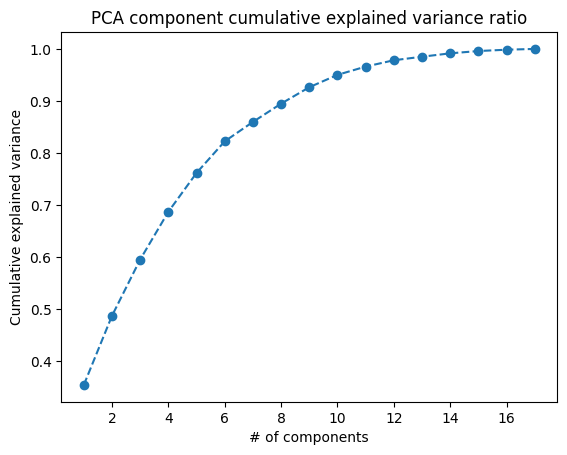

In [244]:


df2 = df.drop('Age',axis=1)

pca = PCA()
pca.fit(df2)
x = pca.explained_variance_ratio_

# plotting the explained variance of each number of components
# saves the plot to html_files
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title("PCA component cumulative explained variance ratio")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")
plt.savefig("../html_files/explainedVariance.png")
plt.show()


In [245]:
pd.DataFrame(pca.components_)

0         1         2         3         4         5         6   \
0  -0.065261  0.251104  0.023802  0.235609  0.501119  0.089672  0.381117   
1  -0.034498 -0.034282 -0.008624 -0.027916 -0.376160 -0.065253  0.672585   
2   0.017298  0.162432 -0.013355  0.176231  0.083258 -0.043949  0.212373   
3  -0.107294 -0.177194 -0.053273 -0.131784  0.114861  0.046062 -0.369638   
4   0.151197  0.154113  0.075536  0.159133 -0.030143  0.066753 -0.385226   
5   0.071561 -0.243183  0.044679 -0.200587  0.016023  0.113983  0.098938   
6   0.132750  0.073289  0.062504  0.018598 -0.158359  0.198153 -0.052940   
7   0.065623  0.535107  0.033691  0.392041 -0.131747 -0.418975 -0.156695   
8   0.167556  0.153362  0.106363  0.119538 -0.278873  0.418319 -0.121631   
9  -0.397828 -0.074563 -0.220901  0.008614 -0.187006 -0.271550 -0.119426   
10 -0.091008 -0.120108 -0.086236 -0.148443  0.022125 -0.044426 -0.042613   
11 -0.236501 -0.083503 -0.175955  0.065746  0.108361 -0.466332 -0.047012   
12 -0.065969 -0.079904 -0.050287 -0.015687 -0.580763 -0.120766  0.000153   
13  0.735312 -0.327546  0.168556  0.003407  0.061300 -0.468468  0.028652   
14 -0.108782 -0.045630  0.057336 -0.242140  0.274132 -0.103231 -0.028039   
15 -0.178783 -0.578241  0.153999  0.742795  0.021003  0.122289 -0.014037   
16 -0.305679  0.052882  0.909477 -0.155977 -0.045307 -0.153519 -0.014628   

          7         8         9         10        11        12        13  \
0   0.439146  0.152758  0.234916  0.107855  0.286691 -0.049657 -0.223147   
1  -0.336405 -0.022740 -0.002778  0.010007  0.341557 -0.024030  0.241424   
2   0.100657  0.050326  0.118706 -0.497335 -0.102624  0.190375  0.540256   
3   0.016921 -0.022529 -0.063464 -0.465577  0.739914 -0.059523  0.041608   
4   0.053496  0.078174  0.115552  0.446973  0.164288  0.163233  0.617430   
5  -0.093568  0.015567  0.097087  0.482601  0.346636  0.201084 -0.103533   
6  -0.101245  0.019877  0.122275 -0.227548 -0.026759  0.779822 -0.335693   
7  -0.212725  0.063015 -0.238469  0.064382  0.199240 -0.030775 -0.227396   
8  -0.177975  0.125248  0.636194 -0.117082  0.001891 -0.383401 -0.111336   
9  -0.053219 -0.022225  0.232402 -0.007513 -0.041512 -0.191130 -0.102171   
10  0.237062 -0.156759  0.128066  0.031041 -0.174227  0.003407  0.099919   
11 -0.103983 -0.119214  0.562783  0.075347  0.032176  0.276599  0.007225   
12  0.615809  0.449237 -0.035272  0.012067  0.075993  0.071665 -0.047784   
13  0.077646  0.019193  0.152560 -0.113667  0.014410 -0.123126 -0.062373   
14 -0.340884  0.824847  0.003779 -0.028799 -0.120467  0.014297  0.050371   
15 -0.092699  0.100559 -0.104948  0.010608 -0.044324  0.021800 -0.016238   
16  0.069872 -0.121472  0.068292 -0.033739 -0.002613 -0.001068  0.011369   

          14        15        16  
0  -0.184399  0.142972  0.017312  
1  -0.300875 -0.008091  0.136923  
2   0.493382  0.176271 -0.029491  
3  -0.051508 -0.045428  0.076758  
4  -0.293056  0.156540 -0.035276  
5   0.643739  0.176187  0.048914  
6  -0.222684  0.227808  0.072261  
7   0.217592 -0.010154  0.295018  
8   0.104572 -0.099849  0.095570  
9  -0.054958  0.731053 -0.144166  
10 -0.038021  0.046854  0.895217  
11 -0.000996 -0.481516 -0.116251  
12  0.067974 -0.173856 -0.064448  
13 -0.091162  0.170951 -0.013459  
14 -0.061665  0.008789  0.137921  
15  0.006439 -0.019416  0.098324  
16  0.000234  0.021136 -0.020673

In [267]:
model = PCA().fit(df2)
X_pc = model.transform(df2)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
# argmax gets the index of the biggest num
comps = pd.DataFrame()
for i in range(n_pcs):
    temp = pd.DataFrame()
    temp['Components']=np.abs(model.components_[i])
    temp['Question']=qcols
    temp = temp.sort_values(by='Components',ascending=False,ignore_index=True)
    print(temp)
    comps[str(i)+' Components']=temp['Question']


#most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

#initial_feature_names = qcols
# get the names
#most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
#dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
#features = pd.DataFrame(dic.items())

    Components Question
0     0.501119       Q5
1     0.439146       Q8
2     0.381117       Q7
3     0.286691      Q12
4     0.251104       Q2
5     0.235609       Q4
6     0.234916      Q10
7     0.223147      Q14
8     0.184399      Q15
9     0.152758       Q9
10    0.142972      Q16
11    0.107855      Q11
12    0.089672       Q6
13    0.065261       Q1
14    0.049657      Q13
15    0.023802       Q3
16    0.017312      Q17
    Components Question
0     0.672585       Q7
1     0.376160       Q5
2     0.341557      Q12
3     0.336405       Q8
4     0.300875      Q15
5     0.241424      Q14
6     0.136923      Q17
7     0.065253       Q6
8     0.034498       Q1
9     0.034282       Q2
10    0.027916       Q4
11    0.024030      Q13
12    0.022740       Q9
13    0.010007      Q11
14    0.008624       Q3
15    0.008091      Q16
16    0.002778      Q10
    Components Question
0     0.540256      Q14
1     0.497335      Q11
2     0.493382      Q15
3     0.212373       Q7
4     0.190375  

In [268]:
comps

0 Components 1 Components 2 Components 3 Components 4 Components  \
0            Q5           Q7          Q14          Q12          Q14   
1            Q8           Q5          Q11          Q11          Q11   
2            Q7          Q12          Q15           Q7           Q7   
3           Q12           Q8           Q7           Q2          Q15   
4            Q2          Q15          Q13           Q4          Q12   
5            Q4          Q14          Q16           Q5          Q13   
6           Q10          Q17           Q4           Q1           Q4   
7           Q14           Q6           Q2          Q17          Q16   
8           Q15           Q1          Q10          Q10           Q2   
9            Q9           Q2          Q12          Q13           Q1   
10          Q16           Q4           Q8           Q3          Q10   
11          Q11          Q13           Q5          Q15           Q9   
12           Q6           Q9           Q9           Q6           Q3   
13           Q1          Q11           Q6          Q16           Q6   
14          Q13           Q3          Q17          Q14           Q8   
15           Q3          Q16           Q1           Q9          Q17   
16          Q17          Q10           Q3           Q8           Q5   

   5 Components 6 Components 7 Components 8 Components 9 Components  \
0           Q15          Q13           Q2          Q10          Q16   
1           Q11          Q14           Q6           Q6           Q1   
2           Q12          Q16           Q4          Q13           Q6   
3            Q2          Q11          Q17           Q5          Q10   
4           Q13          Q15          Q10           Q8           Q3   
5            Q4           Q6          Q14           Q1          Q13   
6           Q16           Q5          Q15           Q2           Q5   
7            Q6           Q1           Q8           Q9          Q17   
8           Q14          Q10          Q12           Q7           Q7   
9            Q7           Q8           Q7           Q4          Q14   
10          Q10           Q2           Q5          Q11           Q2   
11           Q8          Q17           Q1          Q14          Q15   
12           Q1           Q3          Q11           Q3           Q8   
13          Q17           Q7           Q9          Q15          Q12   
14           Q3          Q12           Q3          Q16           Q9   
15           Q5           Q9          Q13          Q17           Q4   
16           Q9           Q4          Q16          Q12          Q11   

   10 Components 11 Components 12 Components 13 Components 14 Components  \
0            Q17           Q10            Q8            Q1            Q9   
1             Q8           Q16            Q5            Q6            Q8   
2            Q12            Q6            Q9            Q2            Q5   
3             Q9           Q13           Q16           Q16            Q4   
4             Q4            Q1            Q6            Q3           Q17   
5            Q10            Q3            Q2           Q10           Q12   
6             Q2            Q9           Q12           Q13            Q1   
7            Q14           Q17           Q13           Q11            Q6   
8             Q1            Q5           Q15           Q15           Q15   
9             Q3            Q8            Q1            Q8            Q3   
10           Q16            Q2           Q17           Q14           Q14   
11            Q6           Q11            Q3            Q5            Q2   
12            Q7            Q4           Q14            Q7           Q11   
13           Q15            Q7           Q10            Q9            Q7   
14           Q11           Q12            Q4           Q12           Q13   
15            Q5           Q14           Q11           Q17           Q16   
16           Q13           Q15            Q7            Q4           Q10   

   15 Components 16 Components  
0             Q4            Q3  
1         

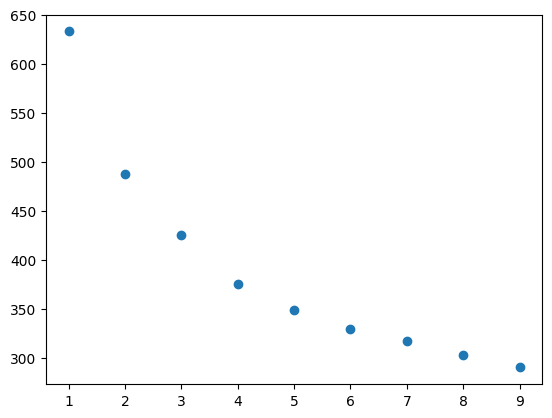

In [248]:
cost = []
for k in range(1,10):
    kmode = KModes(n_clusters=k,init="random",n_init=5,random_state=5)
    kmode.fit_predict(test)
    cost.append(kmode.cost_)
plt.scatter(range(1,10),cost)
plt.show()